# **How to Fit Regression Data with CNN Model in Python**

# **How to Fit Regression Data with CNN Model in Python**

In [1]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
x, y = boston.data, boston.target
print(x.shape) 

(506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(506, 13, 1)


In [4]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

# Defining and fitting the model

In [17]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(13, 1)))
model.add(Conv1D(64, 2, activation="relu", input_shape=(13, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 12, 32)            96        
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 64)            4160      
                                                                 
 flatten_1 (Flatten)         (None, 704)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                45120     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,441
Trainable params: 49,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(13, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 32)            96        
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 64)                24640     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 24,801
Trainable params: 24,801
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(xtrain, ytrain, batch_size=12,epochs=200, verbose=0)

In [19]:
ypred = model.predict(xtest)

14/14 [==============================] - 0s 3ms/step - loss: 8.1490
8.148993492126465
MSE: 12.4068


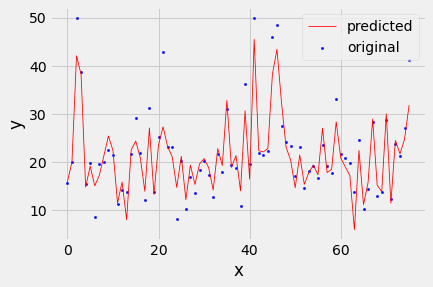

In [21]:
print(model.evaluate(xtrain, ytrain))
#21.21026409947595 
 
print("MSE: %.4f" % mean_squared_error(ytest, ypred))
#MSE: 19.8953 

x_ax = range(len(ypred))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Solving Linear Regression in Python

https://www.geeksforgeeks.org/solving-linear-regression-in-python/  

https://www.geeksforgeeks.org/linear-regression-python-implementation/

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm



slope b1 is 2.8
intercept b0 is 6.200000000000001


Text(0, 0.5, 'Dependent variable y')

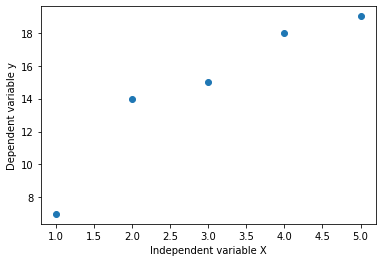

In [11]:
x = np.array([1,2,3,4,5])
y = np.array([7,14,15,18,19])
n = np.size(x)

x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean

Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean

b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('slope b1 is', b1)
print('intercept b0 is', b0)

plt.scatter(x,y)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable y')


Text(0, 0.5, 'y')

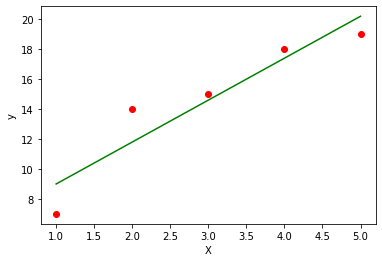

In [12]:
y_pred = b1 * x + b0

plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('y')


In [13]:
error = y - y_pred
se = np.sum(error**2)
print('squared error is', se)

mse = se/n
print('mean squared error is', mse)

rmse = np.sqrt(mse)
print('root mean square error is', rmse)

SSt = np.sum((y - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)


squared error is 10.800000000000004
mean squared error is 2.160000000000001
root mean square error is 1.4696938456699071
R square is 0.8789237668161435


In [14]:
x = x.reshape(-1,1)
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x, y)

# Predict
y_predicted = regression_model.predict(x)

# model evaluation
mse=mean_squared_error(y,y_predicted)

rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [2.8]
Intercept: 6.199999999999999
MSE: 2.160000000000001
Root mean squared error:  1.4696938456699071
R2 score:  0.8789237668161435


Estimated coefficients:
b_0 = 1.2363636363636363   
b_1 = 1.1696969696969697


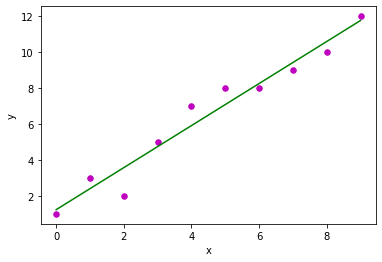

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
 # number of observations/points
 n = np.size(x)

 # mean of x and y vector
 m_x = np.mean(x)
 m_y = np.mean(y)

 # calculating cross-deviation and deviation about x
 SS_xy = np.sum(y*x) - n*m_y*m_x
 SS_xx = np.sum(x*x) - n*m_x*m_x

 # calculating regression coefficients
 b_1 = SS_xy / SS_xx
 b_0 = m_y - b_1*m_x

 return (b_0, b_1)

def plot_regression_line(x, y, b):
 # plotting the actual points as scatter plot
 plt.scatter(x, y, color = "m",
   marker = "o", s = 30)

 # predicted response vector
 y_pred = b[0] + b[1]*x

 # plotting the regression line
 plt.plot(x, y_pred, color = "g")

 # putting labels
 plt.xlabel('x')
 plt.ylabel('y')

 # function to show plot
 plt.show()

def main():
 # observations / data
 x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
 y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

 # estimating coefficients
 b = estimate_coef(x, y)
 print("Estimated coefficients:\nb_0 = {} \
  \nb_1 = {}".format(b[0], b[1]))

 # plotting regression line
 plot_regression_line(x, y, b)

if __name__ == "__main__":
 main()


Multiple linear regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Coefficients:  [-8.95714048e-02  6.73132853e-02  5.04649248e-02  2.18579583e+00
 -1.72053975e+01  3.63606995e+00  2.05579939e-03 -1.36602886e+00
  2.89576718e-01 -1.22700072e-02 -8.34881849e-01  9.40360790e-03
 -5.04008320e-01]
Variance score: 0.7209056672661777


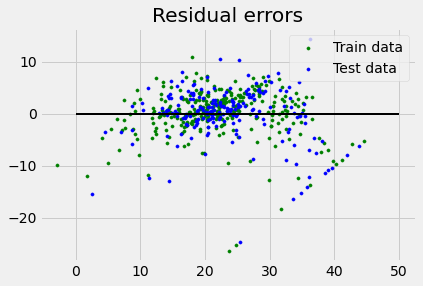

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

# load the boston dataset
boston = datasets.load_boston(return_X_y=False)

# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
             random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

# plot for residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
   color = "green", s = 10, label = 'Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
   color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

## plotting legend
plt.legend(loc = 'upper right')

## plot title
plt.title("Residual errors")

## method call for showing the plot
plt.show()
